In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit

In [ ]:
'''
DirectoryString = '';
ImageFileBase = 'set2_a_';
LaserFileBase = 'set2_L_';
FileExtension = '.dat';

ImageFile_number = 37;
LaserImageNumber = ImageFile_number;


ImageFileName = [DirectoryString ImageFileBase num2str(ImageFile_number) FileExtension];

LaserFileName = [DirectoryString LaserFileBase num2str(LaserImageNumber) FileExtension];
,,,

In [ ]:
'''
with open(ImageFileName, 'rb') as fid:
    A = np.fromfile(fid, np.short).reshape((480, 640)).T
with open(LaserFileName, 'rb') as fid:
    B = np.fromfile(fid, numpy.single).reshape((480, 640)).T
    '''

In [3]:
#Atoms = 54.76E-12*log(( B +NonZeroArray)./(A+NonZeroArray))*2*math.pi/(3*6.084E-13);



In [60]:
import pandas as pd
import numpy as np

def read_matrices(filename, sheet_name='Sheet1'):    #Sheet 1 is the default setting
    # Read only the first few rows where data is expected
    df = pd.read_excel(filename, sheet_name=sheet_name,header=None)

    # Initialize the list to store matrices and the start column index
    matrices = []
    start_col = 0

    # Detect where the columns are completely NaN to find breaks between matrices
    while start_col < df.shape[1]:
        # Ignore initial empty columns if any
        if df.iloc[:, start_col].isna().all():
            start_col += 1
            continue

        # Find the next all-NaN column which signifies the end of a matrix
        end_col = start_col
        while end_col < df.shape[1] and not df.iloc[:, end_col].isna().all():
            end_col += 1

        # Extract the matrix between start_col and end_col, minus one to exclude the NaN column
        matrix_df = df.iloc[:, start_col:end_col].dropna(how='all', axis=1)
        matrices.append(matrix_df.values)  # Convert DataFrame to NumPy array

        # Update start_col to the column after the next NaN column
        start_col = end_col + 1

    return matrices


#Reading Process Example
filename = 'ExtractExcel.xlsx'  # Update with the path to your Excel file
matrices = read_matrices(filename)


A,B,C,D,E,F,G,H= matrices[0],matrices[1],matrices[2],matrices[3],matrices[4],matrices[5],matrices[6],matrices[7]

In [61]:
def extractParameter(matrix):
  return [matrix[0][0],matrix[1][0],matrix[3][0],matrix[2][0]]

initialParameters_H_1= extractParameter(A)
initialParameters_H_2= extractParameter(C)
initialParameters_V_1= extractParameter(E)
initialParameters_V_2= extractParameter(G)      #[amplitude,sigma, background, center]

In [62]:
def filter_nan_row(matrix):
  return matrix[~np.isnan(matrix).any(axis=1)]
B=filter_nan_row(B)
D=filter_nan_row(D)
F=filter_nan_row(F)
H=filter_nan_row(H)


B_x,B_y=B[:,0],B[:,1]
D_x,D_y=D[:,0],D[:,1]
F_x,F_y=F[:,0],F[:,1]
H_x,H_y=H[:,0],H[:,1]

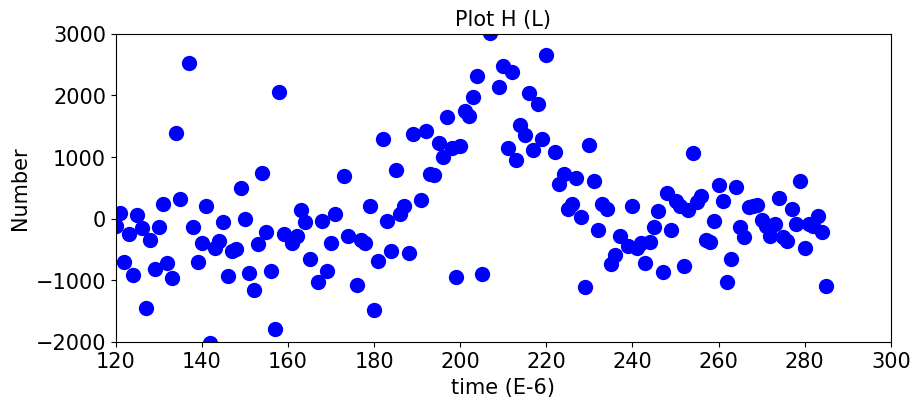

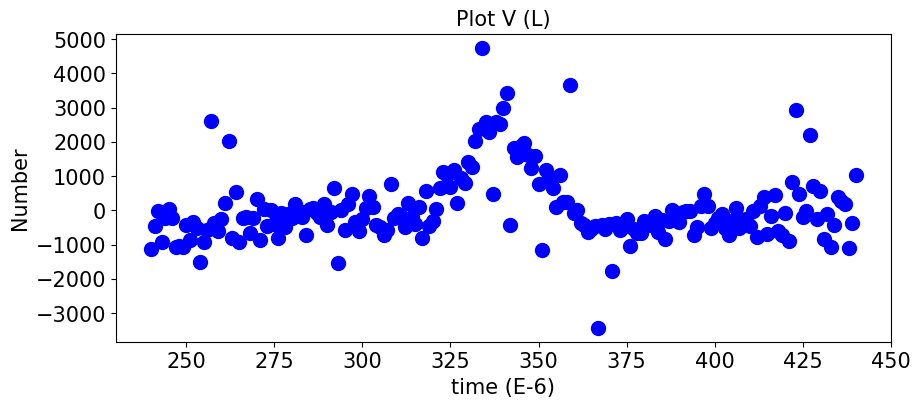

In [63]:
fig1=plt.figure(1,figsize=(10,4))                                             # create new figure for plotting
plt.plot(B_x, B_y, 'blue', linestyle='none', marker='o', markerfacecolor='blue', markersize=10)  # make the plot with round markers
plt.title('Plot H (L)', fontsize=15)                           # Add the plot title

plt.ylabel('Number', fontsize=15)                     # Add the y-axis label, "fontsize" is optional
plt.yticks(size=15)                                            # adjust the size of the y-axis tick number labels

plt.xlim(120, 300)                                            # Set the range of the plot's x-axis
plt.ylim(-2000, 3000)
plt.xlabel('time (E-6)', fontsize=15)                            # Add the x-axis label, "fontsize" is optional
plt.xticks(size=15)                                            # adjust the size of the x-axis tick number labels
fig1.show()

fig2=plt.figure(2,figsize=(10,4))                                             # create new figure for plotting
plt.plot(F_x, F_y, 'blue', linestyle='none', marker='o', markerfacecolor='blue', markersize=10)  # make the plot with round markers
plt.title('Plot V (L)', fontsize=15)                           # Add the plot title

plt.ylabel('Number', fontsize=15)                     # Add the y-axis label, "fontsize" is optional
plt.yticks(size=15)                                            # adjust the size of the y-axis tick number labels

plt.xlabel('time (E-6)', fontsize=15)                            # Add the x-axis label, "fontsize" is optional
plt.xticks(size=15)                                            # adjust the size of the x-axis tick number labels
fig2.show()

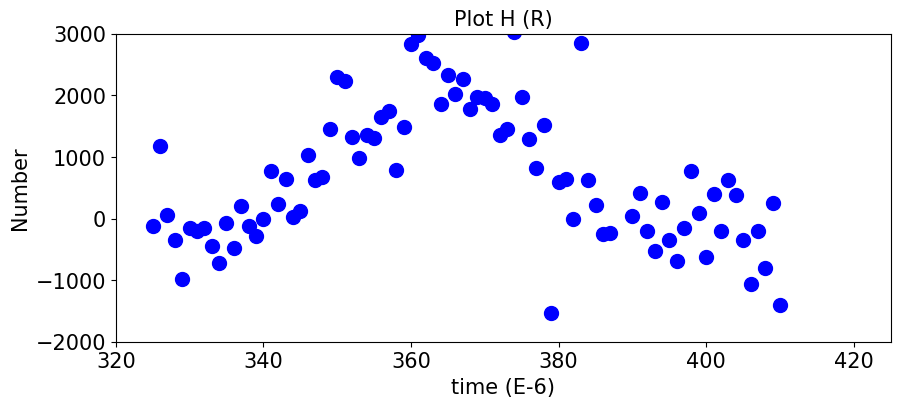

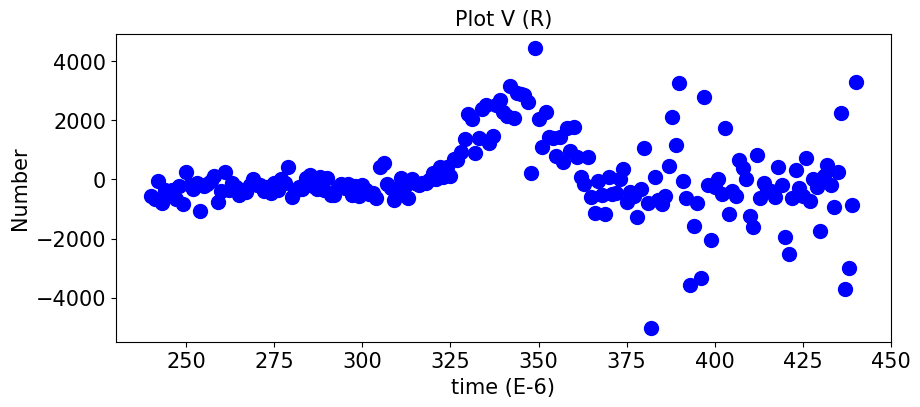

In [64]:
fig3=plt.figure(3,figsize=(10,4))                                             # create new figure for plotting
plt.plot(D_x, D_y, 'blue', linestyle='none', marker='o', markerfacecolor='blue', markersize=10)  # make the plot with round markers
plt.title('Plot H (R)', fontsize=15)                           # Add the plot title

plt.ylabel('Number', fontsize=15)                     # Add the y-axis label, "fontsize" is optional
plt.yticks(size=15)                                            # adjust the size of the y-axis tick number labels

plt.xlim(320, 425)                                            # Set the range of the plot's x-axis
plt.ylim(-2000, 3000)
plt.xlabel('time (E-6)', fontsize=15)                            # Add the x-axis label, "fontsize" is optional
plt.xticks(size=15)                                            # adjust the size of the x-axis tick number labels
fig3.show()

fig4=plt.figure(4,figsize=(10,4))                                             # create new figure for plotting
plt.plot(H_x, H_y, 'blue', linestyle='none', marker='o', markerfacecolor='blue', markersize=10)  # make the plot with round markers
plt.title('Plot V (R)', fontsize=15)                           # Add the plot title

plt.ylabel('Number', fontsize=15)                     # Add the y-axis label, "fontsize" is optional
plt.yticks(size=15)                                            # adjust the size of the y-axis tick number labels

plt.xlabel('time (E-6)', fontsize=15)                            # Add the x-axis label, "fontsize" is optional
plt.xticks(size=15)                                            # adjust the size of the x-axis tick number labels
fig4.show()

In [81]:
def yModel(x,amplitude,sigma,background,center):
  #print("This is the input parameter:"+ str(amplitude)+" "+str(sigma)+" "+str(center)+" "+str(background))
  #print("len of data"+str(len(x)))
  return amplitude*np.exp(-0.5*((x-center)/sigma)**2)+background

def analysis(x_data,y_data,iP,type,y_error):
  #print("Proceed 0")
  finalParameters, finalParameterErrors = curve_fit(yModel, x_data, y_data, iP,y_error, True)
  #print("Proceed 1")
  print("This is the data analysis for "+type+" :")
  #print(finalParameters)
  # Extract Fit values and errors for a=y-offset, b=amplitude, and c=x-offset
  amplitude_fit = finalParameters[0]
  amplitude_error_squared = finalParameterErrors[0,0]
  amplitude_error = np.sqrt(amplitude_error_squared)

  sigma_fit = finalParameters[1]
  sigma_error_squared = finalParameterErrors[1,1]
  sigma_error = np.sqrt(sigma_error_squared)

  background_fit = finalParameters[2]
  background_error_squared = finalParameterErrors[2,2]
  background_error = np.sqrt(background_error_squared)

  center_fit = finalParameters[3]
  center_error_squared = finalParameterErrors[3,3]
  center_error = np.sqrt(center_error_squared)
  #print("Proceed 2")
  print("Model parameters:")
  print("amplitude_fit = ", amplitude_fit, "+/-", amplitude_error)
  print("sigma_fit = ", sigma_fit, "+/-", sigma_error)
  print("background_fit = ", background_fit, "+/-", background_error)
  print("center_fit = ", center_fit, "+/-", center_error)
  a_s_covariance_error2 = finalParameterErrors[1,0]
  a_b_covariance_error2 = finalParameterErrors[2,0]
  a_c_covariance_error2 = finalParameterErrors[3,0]
  s_b_covariance_error2 = finalParameterErrors[2,1]
  s_c_covariance_error2 = finalParameterErrors[3,1]
  b_c_covariance_error2 = finalParameterErrors[3,2]
  #print("Proceed 3")
  print("a_s_covariance_error2 =", a_s_covariance_error2)
  print("a_b_covariance_error2 =", a_b_covariance_error2)
  print("a_c_covariance_error2 =", a_c_covariance_error2)
  print("s_b_covariance_error2 =", s_b_covariance_error2)
  print("s_c_covariance_error2 =", s_c_covariance_error2)
  print("b_c_covariance_error2 =", b_c_covariance_error2)
  Atom_Number_Fit = abs(np.sqrt(2 * np.pi) * sigma_fit * amplitude_fit)
  Atom_Number_Fit_Errorbar=np.sqrt(sigma_error_squared*abs(amplitude_fit**2)+amplitude_error_squared*abs(sigma_fit**2))        #Atom num errorbar
  yModel_i = yModel( x_data, amplitude_fit,sigma_fit, background_fit, center_fit)              # Calculate the Y-array (yModel_i) for the values of the fit at the x_data points
  residuals_y = y_data - yModel_i
  if(y_error is None):
      residuals_y_normalized=residuals_y
  else:
       residuals_y_normalized = residuals_y/y_error                          # Calculate the difference between data and model (linear fit), i.e. the residuals
                                                                              # Normalize the residuals to the Y-error on each data point
  #print("Proceed 4")
  Chi_squared = np.sum(residuals_y_normalized**2)             # Calculate the Chi^2 for the data and fit
  DOF = len(y_data)-len(finalParameters)                      # Calculate the degrees of freedom: DOF = number of data points - number of fit parameters
  Reduced_Chi_squared = Chi_squared/DOF
  print("Fit quality")
  print("Reduced Chi^2 =", Reduced_Chi_squared)

  return [amplitude_fit, sigma_fit, background_fit, center_fit, Atom_Number_Fit,Atom_Number_Fit_Errorbar]


In [82]:
H1=analysis(B_x,B_y,initialParameters_H_1,"H_1",None)  #set Errorbar to None right now    #test_errorbar [0.1 for _ in range(217)]
B_a,B_s,B_b,B_c,Num_1_H,Num_1_H_errorbar=H1[0],H1[1],H1[2],H1[3],H1[4],H1[5]
print("")
print("")
print("")

V1=analysis(F_x,F_y,initialParameters_V_1,"V_1",None)  #set Errorbar to None right now
F_a,F_s,F_b,F_c,Num_1_V,Num_1_V_errorbar=V1[0],V1[1],V1[2],V1[3],V1[4],V1[5]
print("")
print("")
print("")
H2=analysis(D_x,D_y,initialParameters_H_2,"H_2",None)
D_a,D_s,D_b,D_c,Num_2_H,Num_2_H_errorbar=H2[0],H2[1],H2[2],H2[3],H2[4],H2[5]
print("")
print("")
print("")
V2=analysis(H_x,H_y,initialParameters_V_2,"V_2",None)  #set Errorbar to None right now
H_a,H_s,H_b,H_c,Num_2_V,Num_2_V_errorbar=V2[0],V2[1],V2[2],V2[3],V2[4],V2[5]

This is the data analysis for H_1 :
Model parameters:
amplitude_fit =  2733.3336641213223 +/- 0.28967751151562987
sigma_fit =  10.474311632465882 +/- 0.0013278942265887103
background_fit =  -316.5182826485122 +/- 0.07873374424627386
center_fit =  209.68601971637335 +/- 0.0012575177684696068
a_s_covariance_error2 = -0.00018264545440290156
a_b_covariance_error2 = -0.004383356537449414
a_c_covariance_error2 = 6.168086546410712e-11
s_b_covariance_error2 = -3.3584544367119045e-05
s_c_covariance_error2 = -2.3229976977677464e-13
b_c_covariance_error2 = -3.6291827957962477e-13
Fit quality
Reduced Chi^2 = 1134581.632353388



This is the data analysis for V_1 :
Model parameters:
amplitude_fit =  2579.374345625892 +/- 0.3014986934639028
sigma_fit =  9.665342714556955 +/- 0.001351638075861952
background_fit =  -238.4156261715617 +/- 0.08175702328514113
center_fit =  338.1326184963694 +/- 0.0012803203876016577
a_s_covariance_error2 = -0.00019368392289932873
a_b_covariance_error2 = -0.0047264506272

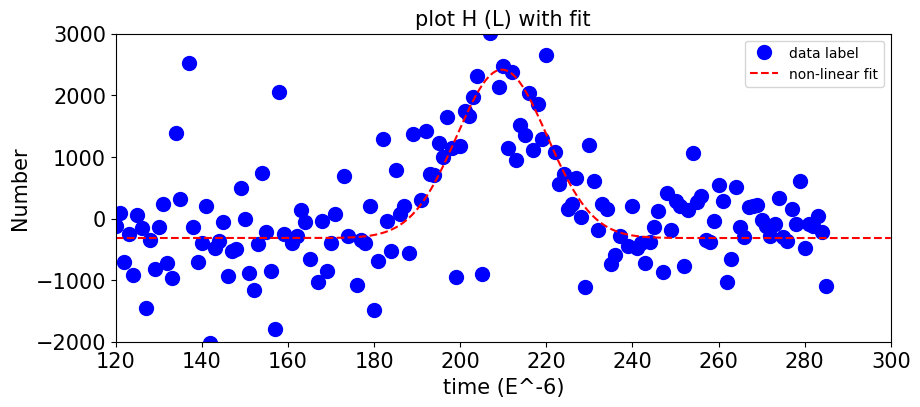

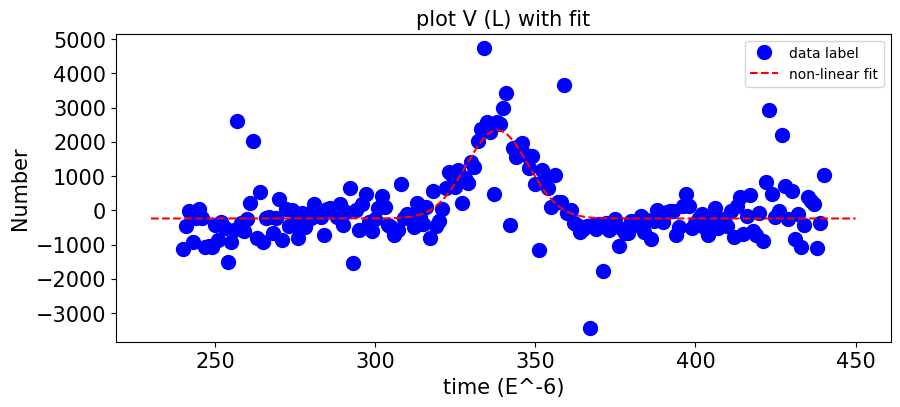

In [84]:
fig5=plt.figure(5,figsize=(10,4))                                             # create new figure for plotting

plt.plot(B_x, B_y, 'blue', linestyle='none', marker='o', markerfacecolor='blue', markersize=10, label='data label')  # make the plot with round markers
plt.title('plot H (L) with fit', fontsize=15)                           # Add the plot title

plt.ylabel('Number', fontsize=15)                     # Add the y-axis label, "fontsize" is optional
plt.yticks(size=15)                                            # adjust the size of the y-axis tick number labels

plt.xlabel('time (E^-6)', fontsize=15)                            # Add the x-axis label, "fontsize" is optional
plt.xticks(size=15)                                            # adjust the size of the x-axis tick number labels


#plt.errorbar(x_data, y_data, y_errorbars, fmt='o', ecolor='green', capsize=5)   # Add error bars

# Generate the points for the fitting curve (linear function in this case)
x_fit = np.linspace(120,300,500)                    # Generate an ordered array of 100 x-values between -0.3 and 4.3
y_fit = yModel(x_fit, B_a, B_s, B_b, B_c)                  # Generate the y-values for the fitting curve (linear in this case)

plt.plot(x_fit,y_fit, 'r--', label='non-linear fit')                         # Plot the fit as a dashed red line on top of the original plot

plt.xlim(120, 300)                                            # Set the range of the plot's x-axis
plt.ylim(-2000, 3000)
# Add in legend
plt.legend()

plt.show()





fig6=plt.figure(4,figsize=(10,4))                                             # create new figure for plotting

plt.plot(F_x, F_y, 'blue', linestyle='none', marker='o', markerfacecolor='blue', markersize=10, label='data label')  # make the plot with round markers
plt.title('plot V (L) with fit', fontsize=15)                           # Add the plot title

plt.ylabel('Number', fontsize=15)                     # Add the y-axis label, "fontsize" is optional
plt.yticks(size=15)                                            # adjust the size of the y-axis tick number labels

plt.xlabel('time (E^-6)', fontsize=15)                            # Add the x-axis label, "fontsize" is optional
plt.xticks(size=15)                                            # adjust the size of the x-axis tick number labels


#plt.errorbar(x_data, y_data, y_errorbars, fmt='o', ecolor='green', capsize=5)   # Add error bars

# Generate the points for the fitting curve (linear function in this case)
x_fit = np.linspace(230,450,500)                    # Generate an ordered array of 100 x-values between -0.3 and 4.3
y_fit = yModel(x_fit, F_a, F_s, F_b, F_c)                  # Generate the y-values for the fitting curve (linear in this case)

plt.plot(x_fit,y_fit, 'r--', label='non-linear fit')                         # Plot the fit as a dashed red line on top of the original plot

# Add in legend
plt.legend()

plt.show()

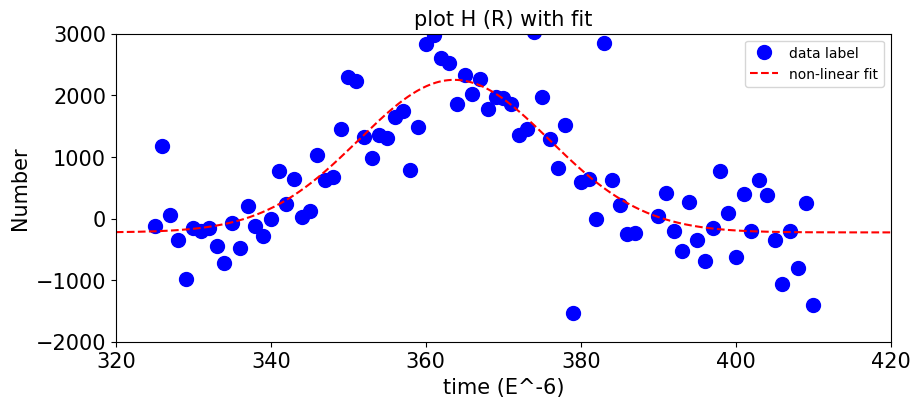

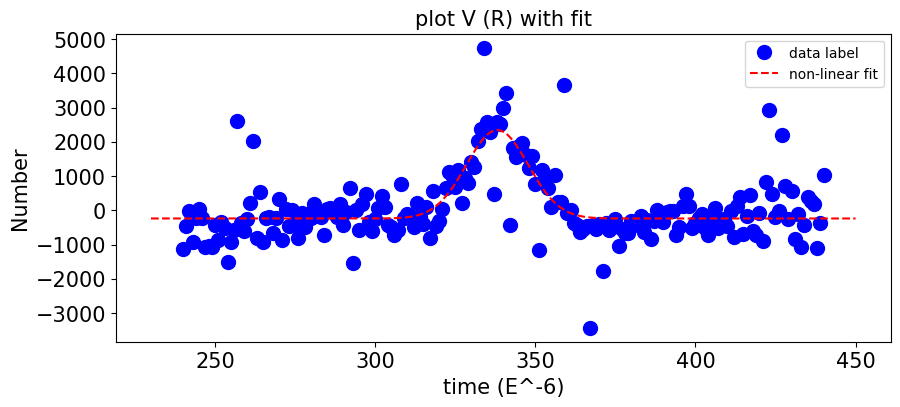

In [85]:
fig7=plt.figure(5,figsize=(10,4))                                             # create new figure for plotting

plt.plot(D_x, D_y, 'blue', linestyle='none', marker='o', markerfacecolor='blue', markersize=10, label='data label')  # make the plot with round markers
plt.title('plot H (R) with fit', fontsize=15)                           # Add the plot title

plt.ylabel('Number', fontsize=15)                     # Add the y-axis label, "fontsize" is optional
plt.yticks(size=15)                                            # adjust the size of the y-axis tick number labels

plt.xlabel('time (E^-6)', fontsize=15)                            # Add the x-axis label, "fontsize" is optional
plt.xticks(size=15)                                            # adjust the size of the x-axis tick number labels


#plt.errorbar(x_data, y_data, y_errorbars, fmt='o', ecolor='green', capsize=5)   # Add error bars

# Generate the points for the fitting curve (linear function in this case)
x_fit = np.linspace(320,420,500)                    # Generate an ordered array of 100 x-values between -0.3 and 4.3
y_fit = yModel(x_fit, D_a, D_s, D_b, D_c)                  # Generate the y-values for the fitting curve (linear in this case)

plt.plot(x_fit,y_fit, 'r--', label='non-linear fit')                         # Plot the fit as a dashed red line on top of the original plot

plt.xlim(320, 420)                                            # Set the range of the plot's x-axis
plt.ylim(-2000, 3000)
# Add in legend
plt.legend()

plt.show()





fig8=plt.figure(4,figsize=(10,4))                                             # create new figure for plotting

plt.plot(F_x, F_y, 'blue', linestyle='none', marker='o', markerfacecolor='blue', markersize=10, label='data label')  # make the plot with round markers
plt.title('plot V (R) with fit', fontsize=15)                           # Add the plot title

plt.ylabel('Number', fontsize=15)                     # Add the y-axis label, "fontsize" is optional
plt.yticks(size=15)                                            # adjust the size of the y-axis tick number labels

plt.xlabel('time (E^-6)', fontsize=15)                            # Add the x-axis label, "fontsize" is optional
plt.xticks(size=15)                                            # adjust the size of the x-axis tick number labels


#plt.errorbar(x_data, y_data, y_errorbars, fmt='o', ecolor='green', capsize=5)   # Add error bars

# Generate the points for the fitting curve (linear function in this case)
x_fit = np.linspace(230,450,500)                    # Generate an ordered array of 100 x-values between -0.3 and 4.3
y_fit = yModel(x_fit, F_a, F_s, F_b, F_c)                  # Generate the y-values for the fitting curve (linear in this case)

plt.plot(x_fit,y_fit, 'r--', label='non-linear fit')                         # Plot the fit as a dashed red line on top of the original plot

# Add in legend
plt.legend()

plt.show()

In [86]:
#Ratio analysis   only focus on the left atom currently

#Error analysis
total_num_errorbar_H=np.sqrt(Num_1_H_errorbar**2+Num_2_H_errorbar**2)
total_num_errorbar_V=np.sqrt(Num_1_V_errorbar**2+Num_2_V_errorbar**2)

total_num_H=Num_1_H+Num_2_H
total_num_V=Num_1_V+Num_2_V

Left_H_ratio=Num_1_H/(Num_1_H+Num_2_H)
Left_V_ratio=Num_1_V/(Num_1_V+Num_2_V)

L_H_errorbar=Left_H_ratio*np.sqrt((Num_1_H_errorbar/Num_1_H)**2+(total_num_errorbar_H/total_num_H)**2)
L_V_errorbar=Left_V_ratio*np.sqrt((Num_1_V_errorbar/Num_1_V)**2+(total_num_errorbar_V/total_num_V)**2)

print("Left atom ratio(H) = "+str(Left_H_ratio)+" ± "+str(L_H_errorbar))
print("Left atom ratio(V) = "+str(Left_V_ratio)+" ± "+str(L_V_errorbar))

Left atom ratio(H) = 0.48453277515828364 ± 3.967902405381753e-05
Left atom ratio(V) = 0.42532222841681977 ± 3.6555809544913274e-05
